In [165]:
%reset


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [168]:
%reload_ext autoreload
%autoreload 1

In [169]:
from hydroplotting import funcutils as fc

In [170]:
#read in data
path_flow_obs = ROOT_DIR + '/Data/Raw/12147600_ref_short.csv'
path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_grid.day'
#path_flow_model = ROOT_DIR + '/Data/Raw/12147600_67.day'

<AxesSubplot:xlabel='datetime'>

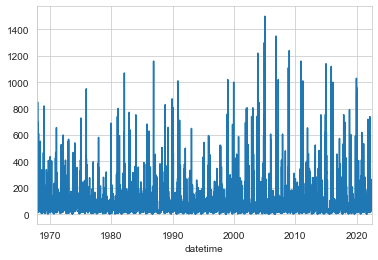

In [171]:
flow_obs = pd.read_csv(path_flow_obs,  header = None)
flow_obs.columns = ['year', 'month', 'day', 'Q_cms']
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
flow_obs = flow_obs.set_index('datetime')
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
fc.calc_water_year_apply(flow_obs)
flow_obs['water_year_str'] = flow_obs['water_year'].astype(str)
flow_obs.Q_cms.plot()
#flow_obs

In [172]:
#monthly mean
#flow_obs_mm = flow_obs.resample('M').mean()

In [173]:
flow_obs

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1967-11-01,1967,11,1,114.0,1967-11-01,1968,1968
1967-11-02,1967,11,2,54.0,1967-11-02,1968,1968
1967-11-03,1967,11,3,37.0,1967-11-03,1968,1968
1967-11-04,1967,11,4,29.0,1967-11-04,1968,1968
1967-11-05,1967,11,5,24.0,1967-11-05,1968,1968
...,...,...,...,...,...,...,...
2022-06-01,2022,6,1,104.0,2022-06-01,2022,2022
2022-06-02,2022,6,2,119.0,2022-06-02,2022,2022
2022-06-03,2022,6,3,161.0,2022-06-03,2022,2022


In [174]:
flow_model = pd.read_csv(path_flow_model, sep='\s+', header = None)
flow_model.columns = ['year', 'month', 'day', 'Q_cms']
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
flow_model = flow_model.set_index('datetime')
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
#apply water year
fc.calc_water_year_apply(flow_model)
flow_model['water_year_str'] = flow_model['water_year'].astype(str)
#flow_model

In [175]:
flow_model

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1981-01-01,1981,1,1,292.9715,1981-01-01,1981,1981
1981-01-02,1981,1,2,149.9101,1981-01-02,1981,1981
1981-01-03,1981,1,3,54.4902,1981-01-03,1981,1981
1981-01-04,1981,1,4,26.4801,1981-01-04,1981,1981
1981-01-05,1981,1,5,14.9948,1981-01-05,1981,1981
...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,25.0382,2020-12-27,2021,2021
2020-12-28,2020,12,28,18.0051,2020-12-28,2021,2021
2020-12-29,2020,12,29,13.9614,2020-12-29,2021,2021


In [176]:
period1_model = flow_model.loc['1981-10-01':'2000-09-30']
period2_model = flow_model.loc['2000-10-01':'2015-09-30']
period_all_model = flow_model.loc['1981-10-01':'2015-09-30']
period1_model_monthly_mean = period1_model.groupby(period1_model.index.month).mean()
period2_model_monthly_mean = period2_model.groupby(period2_model.index.month).mean()
period_all_model_monthly_mean = period_all_model.groupby(period_all_model.index.month).mean()

period1_obs = flow_obs.loc['1981-10-01':'2000-09-30']
period2_obs = flow_obs.loc['2000-10-01':'2015-09-30']
period_all_obs = flow_obs.loc['1981-10-01':'2015-09-30']
period1_obs_monthly_mean = period1_obs.groupby(period1_obs.index.month).mean()
period2_obs_monthly_mean = period2_obs.groupby(period2_obs.index.month).mean()
period_all_obs_monthly_mean = period_all_obs.groupby(period_all_obs.index.month).mean()


In [177]:
def month_wy_for_plotting(calendar_monthly_mean):
    temp = calendar_monthly_mean.loc[10:12]
    model_monthly_mean_plot = pd.concat([temp, calendar_monthly_mean]).reset_index(drop = True)
    model_monthly_mean_plot.drop(model_monthly_mean_plot.tail(3).index, inplace = True)
    return model_monthly_mean_plot

period1_model_monthly_mean_plot = month_wy_for_plotting(period1_model_monthly_mean)
period2_model_monthly_mean_plot = month_wy_for_plotting(period2_model_monthly_mean)
period_all_model_monthly_mean_plot = month_wy_for_plotting(period_all_model_monthly_mean)

period1_obs_monthly_mean_plot = month_wy_for_plotting(period1_obs_monthly_mean)
period2_obs_monthly_mean_plot = month_wy_for_plotting(period2_obs_monthly_mean)
period_all_obs_monthly_mean_plot = month_wy_for_plotting(period_all_obs_monthly_mean)

Text(0, 0.5, 'Q [cms]')

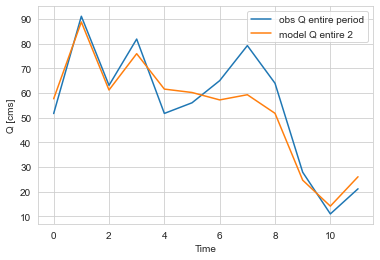

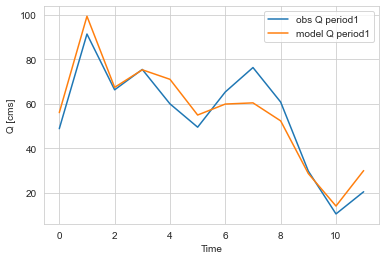

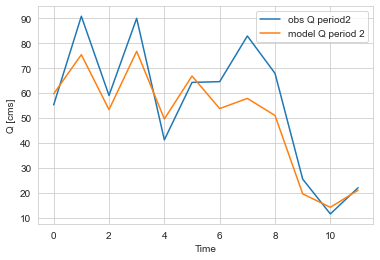

In [178]:
#f, (ax1, ax2) = plt.subplots(1, 2) # sharey=True
ax1 = period_all_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q entire period')
period_all_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q entire 2', ax = ax1)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

ax2 = period1_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q period1')
period1_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period1', ax = ax2)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

ax3 = period2_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q period2')
period2_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period 2', ax = ax3)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

#period1_model_monthly_mean

In [109]:
flow_model_by_wy = flow_model.groupby(['water_year_str'])
flow_obs_by_wy = flow_obs.groupby(['water_year_str'])

In [40]:
wy_groups = flow_model_by_wy.groups
#wy_groups
wy_groups.keys()

dict_keys(['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])

In [41]:
model_2012 = flow_model_by_wy.get_group('2012')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]


In [42]:
obs_2012 = flow_obs_by_wy.get_group('2012')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]
obs_2012


,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
2011-10-01,2011,10,1,12.00,2011-10-01,2012,2012
2011-10-02,2011,10,2,11.30,2011-10-02,2012,2012
2011-10-03,2011,10,3,12.30,2011-10-03,2012,2012
2011-10-04,2011,10,4,14.20,2011-10-04,2012,2012
2011-10-05,2011,10,5,21.40,2011-10-05,2012,2012
...,...,...,...,...,...,...,...
2012-09-26,2012,9,26,3.78,2012-09-26,2012,2012
2012-09-27,2012,9,27,3.74,2012-09-27,2012,2012
2012-09-28,2012,9,28,3.63,2012-09-28,2012,2012


In [ ]:
 sns.relplot(data = flow_obs_small, x="datetime", y="Q_cms", hue="month", kind="line")

In [43]:
nse_test = fc.nse(model_2012['Q_cms'], obs_2012['Q_cms'])
nse_test

0.48930157154117193

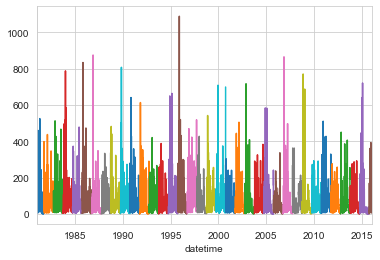

In [96]:
#initialize list
nse = []
year = []
for group in flow_obs_by_wy:
    for gr in flow_model_by_wy:
        if group[0]==gr[0]:
            nse_test = fc.nse(gr[1].Q_cms, group[1].Q_cms)
            gr[1].Q_cms.plot()
            #sns.relplot(data=gr[1], x="datetime", y="Q_cms", hue="month", kind="line")
            year.append(group[0])
            nse.append(nse_test)
            #nse(0) = gr[0]
            #nse(1) = nse_test
nse_run = dict(zip(year, nse))

In [45]:
nse_run

{'1981': 0.8402541835197412,
 '1982': 0.5286291052808738,
 '1983': 0.7016799281597919,
 '1984': 0.7988162949747949,
 '1985': 0.4287479006656687,
 '1986': 0.7071633873837162,
 '1987': 0.7951986703851903,
 '1988': 0.5321582779440033,
 '1989': 0.6292894560521705,
 '1990': 0.5720342291346088,
 '1991': 0.5744185738528943,
 '1992': 0.5856670070118106,
 '1993': 0.5476666694453621,
 '1994': 0.4874486022535852,
 '1995': 0.6085688830623861,
 '1996': 0.5009628694179389,
 '1997': 0.3524360178368272,
 '1998': 0.5025401956481181,
 '1999': 0.541655296927573,
 '2000': 0.69307644264811,
 '2001': 0.519153271307301,
 '2002': 0.6695686019934726,
 '2003': 0.6380313784077992,
 '2004': 0.42197707358029046,
 '2005': 0.5476646306811702,
 '2006': 0.5195843348492722,
 '2007': 0.7472362383256288,
 '2008': 0.5829829346529684,
 '2009': 0.7520624419558526,
 '2010': 0.471549915159556,
 '2011': 0.5581562973245633,
 '2012': 0.48930157154117193,
 '2013': 0.3929725497765534,
 '2014': 0.555285864721327,
 '2015': 0.6691765

In [97]:
gr[1]

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
2015-10-01,2015,10,1,2.7128,2015-10-01,2016,2016
2015-10-02,2015,10,2,2.9316,2015-10-02,2016,2016
2015-10-03,2015,10,3,2.7032,2015-10-03,2016,2016
2015-10-04,2015,10,4,2.4024,2015-10-04,2016,2016
2015-10-05,2015,10,5,2.1892,2015-10-05,2016,2016
...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,8.1309,2015-12-27,2016,2016
2015-12-28,2015,12,28,8.1614,2015-12-28,2016,2016
2015-12-29,2015,12,29,10.3486,2015-12-29,2016,2016


In [46]:
flow_model

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1981-01-01,1981,1,1,293.0442,1981-01-01,1981,1981
1981-01-02,1981,1,2,150.0163,1981-01-02,1981,1981
1981-01-03,1981,1,3,54.5583,1981-01-03,1981,1981
1981-01-04,1981,1,4,26.4289,1981-01-04,1981,1981
1981-01-05,1981,1,5,15.0847,1981-01-05,1981,1981
...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,8.1309,2015-12-27,2016,2016
2015-12-28,2015,12,28,8.1614,2015-12-28,2016,2016
2015-12-29,2015,12,29,10.3486,2015-12-29,2016,2016


In [91]:
#select periods
period1_model = flow_model.loc['1981-10-1':'2000-9-31']
period2_model = flow_model.loc['2000-10-1':'2015-9-31']

#period1_model_mean = period1_model.resample('M').mean()
#period2_model_mean = period2_model.resample('M').mean()

period1_model_monthly_mean = period1_model.groupby(period1_model.index.month).mean()
period2_model_monthly_mean = period2_model.groupby(period2_model.index.month).mean()


#test = flow_model.resample('M').mean()
#test = flow_model.resample('M').mean()
#multi_month_mean = flow_model.groupby(flow_model.index.month).mean()
#multi_month_mean.Q_cms.plot()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [2000-9-31] of type str

In [ ]:
def month_wy_for_plotting(calendar_monthly_mean):
    temp = calendar_monthly_mean.loc[10:12]
    model_monthly_mean_plot = pd.concat([temp, calendar_monthly_mean]).reset_index(drop = True)
    model_monthly_mean_plot.drop(model_monthly_mean_plot.tail(3).index, inplace = True)
    return model_monthly_mean_plot

period1_model_monthly_mean_plot = month_wy_for_plotting(period1_model_monthly_mean)
period2_model_monthly_mean_plot = month_wy_for_plotting(period2_model_monthly_mean)


In [92]:
period1_model_monthly_mean_plot

,year,month,day,Q_cms,water_year
0,2002.000000,10.0,16.000000,43.227503,2003.000000
1,2002.000000,11.0,15.500000,64.423668,2003.000000
2,2002.000000,12.0,16.000000,40.752696,2003.000000
3,2003.000000,1.0,16.000000,64.130205,2003.000000
4,2003.007092,2.0,14.602837,29.446082,2003.007092
5,2003.000000,3.0,16.000000,51.895327,2003.000000
6,2003.000000,4.0,15.500000,40.513279,2003.000000
7,2003.000000,5.0,16.000000,62.062145,2003.000000
8,2002.187500,6.0,14.875000,60.278761,2002.187500
9,2002.000000,7.0,16.000000,29.139624,2002.000000


Text(0, 0.5, 'Q [cms]')

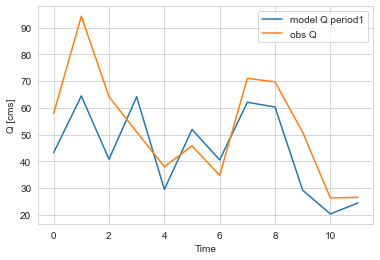

In [93]:


#period1_model_monthly_mean_plot.Q_cms.plot()

ax = period1_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period1')
period2_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q', ax = ax)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')
#period1_model_monthly_mean


In [94]:
period1_model_monthly_mean

,year,month,day,Q_cms,water_year
datetime,,,,,
1,2003.000000,1.0,16.000000,64.130205,2003.000000
2,2003.007092,2.0,14.602837,29.446082,2003.007092
3,2003.000000,3.0,16.000000,51.895327,2003.000000
4,2003.000000,4.0,15.500000,40.513279,2003.000000
5,2003.000000,5.0,16.000000,62.062145,2003.000000
6,2002.187500,6.0,14.875000,60.278761,2002.187500
7,2002.000000,7.0,16.000000,29.139624,2002.000000
8,2002.000000,8.0,16.000000,20.304452,2002.000000
9,2002.000000,9.0,15.500000,24.421220,2002.000000


In [48]:
#plot modeled SWE vs. observed at Skookum Creek
ax = flow_model_month.plot(kind='line',  y = 'Q_cms', label = 'model Q')
flow_obs_month.plot(kind='line',  y = 'Q_cms', label = 'obs Q', ax = ax)
ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

NameError: name 'flow_model_month' is not defined